
<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Regresión lineal</h1>
  <p></p>
</div>

<img src="images/tipos.png" height="300" width="600" >

Es sabido que los grillos cantan con más frecuencias en los días de más calor. Durante décadas, entomólogos profesionales y aficionados han catalogado datos sobre la cantidad de cantos por minuto y la temperatura. A continuación analizamos una base de datos sobre grillos.

En primer lugar, es necesario realizar una representación de los datos para examinarlos:

<img src="images/grillos.png" height="800" width="800" >

Efectivamente, la representación muestra que la cantidad de cantos aumenta con la temperatura. 

¿Es lineal la relación entre los cantos y la temperatura? 

Sí, ya que es posible dibujar una línea recta como la siguiente para representar dicha relación. Si bien la línea no pasa perfectamente por cada punto, demuestra con claridad la relación entre la temperatura y los cantos por minuto para dichos puntos. 

<img src="images/grillos2.png" height="800" width="800" >

<img src="images/grillos3.png" height="800" width="800" >

Si bien la línea no pasa perfectamente por cada punto, demuestra con claridad la relación entre la temperatura y los cantos por minuto para dichos puntos. Si aplicamos un poco de álgebra, podemos determinar esta relación de la siguiente manera:


$y = mx + b$

donde:

- $y$ es la temperatura en grados centígrados, correspondiente al valor que intentamos predecir.
- $m$ es la pendiente de la línea.
- $x$ es la cantidad de cantos por minuto, correspondiente al valor de nuestro atributo de entrada.
- $b$ es la intersección en $y$.

Según las convenciones del aprendizaje automático, la ecuación para un modelo se escribirá de una forma un poco diferente:

$y^{\prime} = b + w_1 x_1$ 

donde:

$y^{\prime}$ es la etiqueta predicha (un resultado deseado).
$b$ es la ordenada al origen (la intersección en en eje $y$). En alguna literatura de aprendizaje automático, se hace referencia a ella como $w_0$.

$w_1$ es la ponderación del atributo 1. La ponderación es el mismo concepto de la "pendiente"
$m$ , que se indicó anteriormente.
$x_1$ es un atributo (una entrada conocida).

Para inferir (predecir) la temperatura $y^{\prime}$ para un valor $x_1$ nuevo de cantos por minuto , solo agrega el valor de
$x_1$ a este modelo.

Los subíndices (p. ej., $w_1$ y $x_1$) indican modelos más sofisticados que se basan en varios atributos. Por ejemplo, un modelo que se basa en tres atributos usaría la siguiente ecuación:

$y^{\prime} = b + w_1 x_1 + w_2 x_2 + w_3 x_3$ 

#### Linea recta 

In [6]:


from matplotlib import pyplot

#Función Lineal.
def f(x):
    return x-7

#En esta variable se genera una lista con valores del -10 al 10.
#Todos estos valores serán los que tomara x.
x = range(-10, 10)

#Con el método plot especificamos que función graficaremos.
#El primer argumento es la variable con los valores de x.
#El segundo argumento le pasamos todos estos valares a la función con ayuda de un bucle.
pyplot.plot(x, [f(i) for i in x])

#Establecemos el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

#Especificamos los limites de los ejes.
pyplot.xlim(-11, 11)
pyplot.ylim(-11, 11)

#Guardamos el grafico en una imagen "png".
pyplot.savefig("función_lineal.png")

# Mostramos el gráfico.
pyplot.show()



<Figure size 640x480 with 1 Axes>

#### Otro ejemplo de relación lineal

<img src="images/lineal.png" height="800" width="800" >

<div class="alert alert-info" role="alert"><i class="fa fa-lightbulb-o" aria-hidden="true"></i> <strong>¡Más sobre el tema!</strong> https://developers.google.com/machine-learning/crash-course/descending-into-ml/linear-regression?hl=es-419</div>

# Linear Regression Example
Este ejemplo usa sólo una y dos característica (variable) del conjunto de datos de diabetes (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) y IMDB EDA (www.kaggle.com/nachrism/imdb-eda) (http://archive.ics.uci.edu/ml/index.php). En la primera parte sólo utilizamos  (1) y (2) variables para poder ilustrar de forma gráfica bi/tri-dimensional la técnica de regresión. Por último en cada ejemplo evaluaremos la validez del modelo creado.

La evaluación del rendimiento de un modelo es una de las fases principales en el proceso de ciencia de datos. Indica el nivel de acierto de las puntuaciones (predicciones) de un conjunto de datos mediante un modelo entrenado.En las siguientes secciones, se crearán modelos de regresión simples, y se evaluará su rendimiento con los módulos Evaluar modelo y Validar modelo de forma cruzada.

#### Nota: Descargar WEKA, Ggobi y Spyder (Scientific PYthon Development EnviRonment)

In [7]:
#cargar las bibliotecas

import pandas as pd
import numpy as np 
from sklearn import linear_model 
from sklearn.metrics import r2_score

# asignarle un alias a la función encargada de crear los modelos de regresion lineal
reg = linear_model.LinearRegression()

##  IMDB EDA 
Es un conjunto de datos de las 1,000 películas más populares en IMDB en los últimos 10 años. 
Siéntase libre de jugar con él y obtener ideas interesantes.

In [8]:
df = pd.read_csv('data/movies2.csv')
#print(df.describe())

In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Seleccionemos una variable (Serie) del Dataframe original, la variable a selecionar no se basa en algún criterio específico

In [10]:
x_ = df['movie_facebook_likes']
#tipo de variable
print(type(x_))
#print(x_)

<class 'pandas.core.series.Series'>


cuando sólo se extrae UNA variable, el tipo de datos es de tipo `Series`. Por tal, se debe de convertir en tipo `ndarray`. Se debe de tomar en cuenta que el tipo de dato `ndarray` debe de ser una matrix  con una sóla columna.

In [11]:
#convertir la variable tipo `Series` a `ndarray`
X = x_[:,np.newaxis] # Series to ndarray
print(X)
print(type(X))

[[ 33000]
 [     0]
 [ 85000]
 [164000]
 [     0]
 [ 24000]
 [     0]
 [ 29000]
 [118000]
 [ 10000]
 [197000]
 [     0]
 [     0]
 [  5000]
 [ 48000]]
<class 'numpy.ndarray'>


Una forma alternativa de ver lo anterior es mediante las siguientes sentencias

In [12]:
#obtener los valores de la serie 'x'
X_= x_.as_matrix() #or  x.values

C:\Users\SantaCruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
print((X_))
print(type(X_))

[ 33000      0  85000 164000      0  24000      0  29000 118000  10000
 197000      0      0   5000  48000]
<class 'numpy.ndarray'>


La variable `X_` es una vector (array) de tipo `numpy.ndarray`. Pero se necesita una  matriz,  con una sóla columna.

In [15]:
X_= X_.reshape(X.size, 1)# size almacena el número de elementos de la Serie
print(X_)

[[ 33000]
 [     0]
 [ 85000]
 [164000]
 [     0]
 [ 24000]
 [     0]
 [ 29000]
 [118000]
 [ 10000]
 [197000]
 [     0]
 [     0]
 [  5000]
 [ 48000]]


In [16]:
print(type(X_))

<class 'numpy.ndarray'>


Obter la variable objetivo para la regresión, para este caso utilizaremos la varibale `imdb_score`

In [19]:
y = df['imdb_score']
print((y.size))

15


Para entrenar el modelo de regresión se utiliza la función __.fit()__, que recibe como parámetros una `matriz` con las variabales descritivas y una `Series` o `ndarray` que representa la variable objetivo

In [21]:
reg.fit(X_,y_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# coeficiente de la regresión lineal
m = reg.coef_
reg.coef_

array([3.84816446e-06])

In [24]:
#intercepción con el eje Y
b = reg.intercept_
reg.intercept_

6.917083915777934

In [27]:
#imprimir la ecuación de la recta
print('y = {0}*x+{1}'.format(m,b))

y = [3.84816446e-06]*x+6.917083915777934


### Evaluar el modelo de regresión 
Supongamos que quiere predecir el precio de un automóvil mediante algunas características, como sus dimensiones, caballos de potencia, especificaciones del motor, etc. Se trata de un problema de regresión típico, donde la variable objetivo (price) es un valor numérico continuo. Podemos generar un modelo de regresión lineal simple que, dados los valores de las características de un automóvil determinado, pueda predecir el precio de ese automóvil. Este modelo de regresión se puede usar para puntuar el mismo conjunto de datos con que se entrenó. Cuando se tienen los precios predichos de todos los automóviles, se puede evaluar el rendimiento del modelo con una comparación de cuánto se desvían en promedio las predicciones de los precios reales. 



Para esta caso las variables respuesta `y` son los datos reales y los datos predichos (`y_p`) son los que nos arrojas  el modelo al ingresar `X_`.

In [28]:
y_p = reg.predict(X_)
print(y_p)

[7.04407334 6.91708392 7.2441779  7.54818289 6.91708392 7.00943986
 6.91708392 7.02868069 7.37116732 6.95556556 7.67517232 6.91708392
 6.91708392 6.93632474 7.10179581]


Las métricas de evaluación disponibles para los modelos de regresión son: __Mean Absolute Error, Root Mean Absolute Error, Relative Absolute Error, Relative Squared Error y `Coefficient of Determination`__.

El término "error" representa aquí la diferencia entre el valor predicho y el valor verdadero. Normalmente, se calcula el valor absoluto o el cuadrado de esta diferencia para capturar la magnitud total de errores en todas las instancias, dado que la diferencia entre el valor verdadero y el predicho puede ser negativa en algunos casos. Las métricas de error miden el rendimiento de predicción de un modelo de regresión en cuanto a la desviación media de sus predicciones a partir de los valores reales. Los valores de error más bajos implican que el modelo es más preciso a la hora de realizar predicciones. Una métrica de error general de $0$ significa que el modelo se ajusta a los datos perfectamente.

El coeficiente de determinación, que también se conoce como R cuadrado, es también una manera estándar de medir cuánto se adapta el modelo a los datos. Se puede interpretar como la proporción de la variación que explica el modelo. Una mayor proporción es mejor en este caso, donde 1 indica un ajuste perfecto.

Para obtener el coefiente de determinación _(R cuadrada)_ utilizamos la función _r2_score()_

In [29]:
print("El valor de r^2", r2_score(y_,y_p))

El valor de r^2 0.13918361083362363


#### Coeficiente de Determinación

La bondad de la predicción depende de la relación entre las variables. Si dos variables no covarían, no podremos hacer predicciones válidas, y si la intensidad de la covariación es moderada, las predicciones no serán demasiado buenas. En consecuencia, hay que disponer de alguna medida de la capacidad de la ecuación de Regresión para obtener predicciones buenas (en el sentido de que sean lo menos erróneas posible).

Esta medida es el Coeficiente de Determinación, que es el cuadrado del coeficiente de correlación de Pearson, y da la proporción de variación de la variable Y que es explicada por la variable X (variable predictora o explicativa). Si la proporción es igual a 0, significa que la variable predictora no tiene capacidad predictiva de la variable a predecir (Y). Cuanto mayor sea la proporción, mejor será la predicción. Si llegara a ser igual a 1 la variable predictora explicaría TODA la variación de Y, y las predicciones NO tendrían error.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png" />

## Correlación no implica causalidad

En general, una relación entre dos variables no asegura si uno causa el otro, o al revés, o ambos, o si
pueden ser causados por algo completamente distinto.

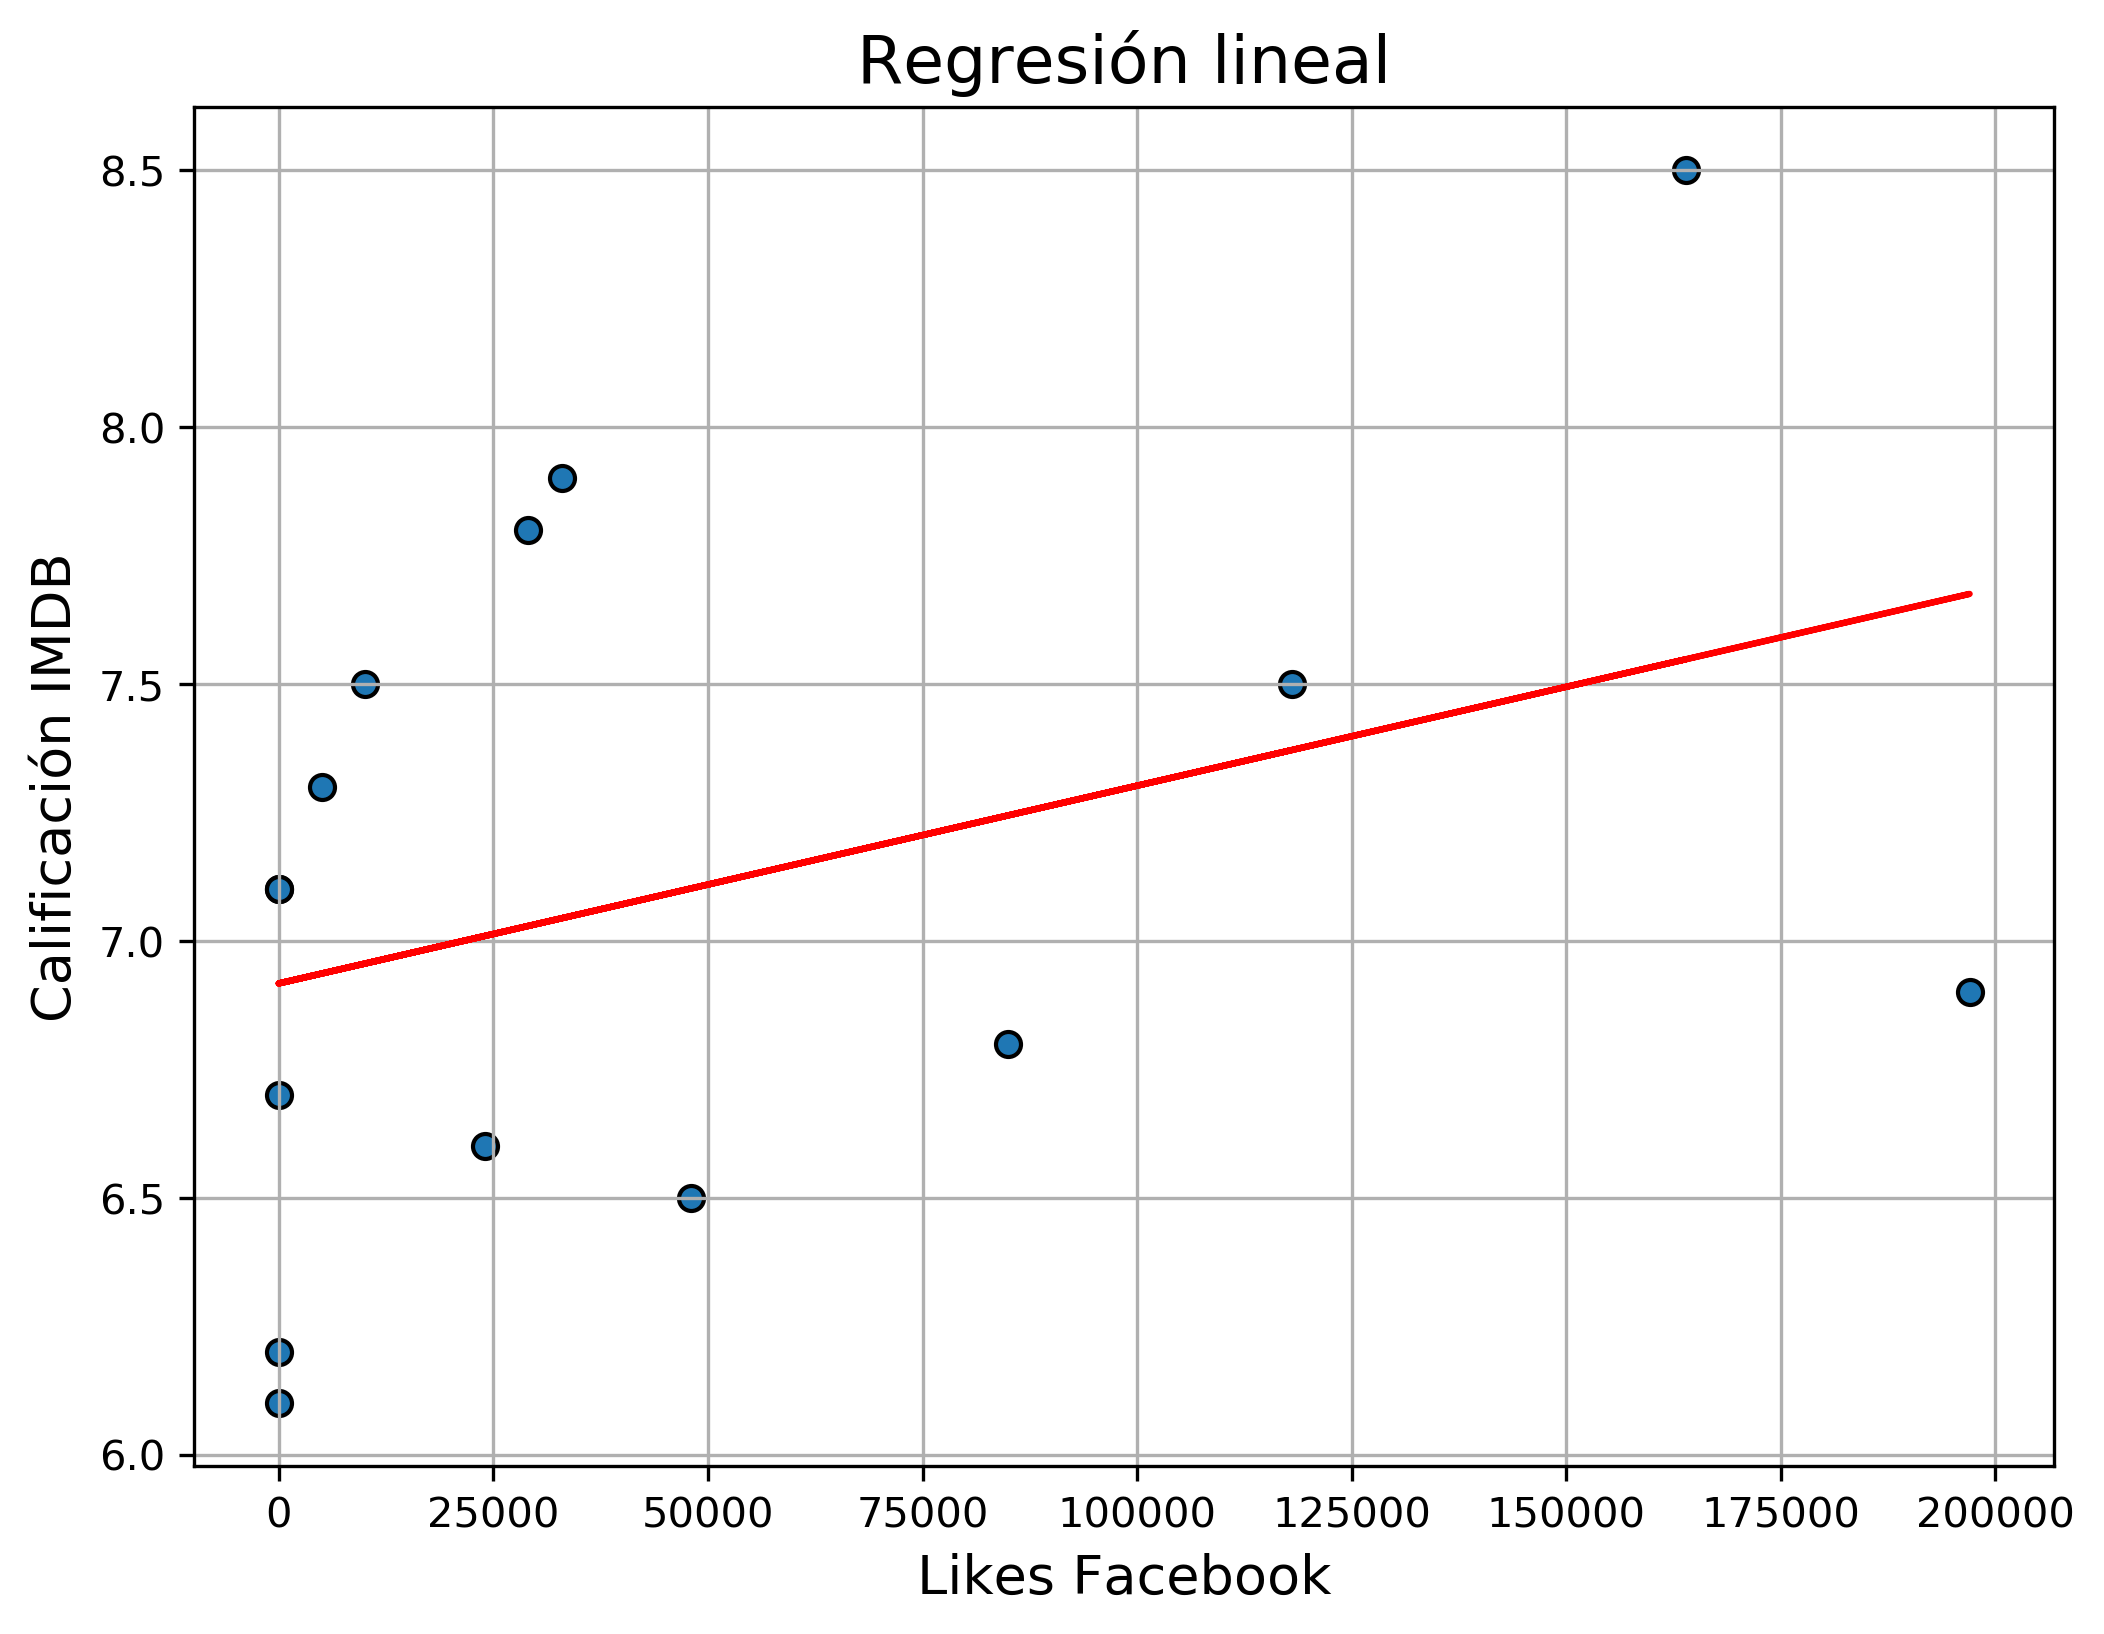

In [30]:
import matplotlib
import matplotlib.pyplot as plt
#configurar la calidad y propiedades del gráfico

#leer mas https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
# facecolor : color de fondo
# edgecolor : color de borde de la imagen.
#Uso:
#facecolor="white", edgecolor="black"
fig = plt.figure(num = None, figsize = (8, 6), dpi = 300 ,  edgecolor = 'k', facecolor = 'white')
plt.grid(True)

#fig, ax = plt.subplots()
plt.scatter(x_,y_, edgecolors=(0, 0, 0))

plt.plot(x_,y_p,color = 'red')
plt.title('Regresión lineal', fontsize=16)
plt.xlabel('Likes Facebook',fontsize=13)
plt.ylabel('Calificación IMDB',fontsize=13)

#guardar el gráfico en disco local 
fig.savefig('figura3.png', dpi = 900, transparent = False)

In [31]:
import seaborn as sns
sns.set(style="ticks")

nw = df.columns.values
print(nw)
# Load the example dataset for Anscombe's quartet
#df = sns.load_dataset("anscombe")
#print(df)
# Show the results of a linear regression within each dataset
#sns.lmplot(x=x, y=y)

['num' 'color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


### Modelo productivo

Ahora supongamos que queremo predecir la 'Calificación' que IMDB  le dará a la nueva película Avengers : Infinity War, dado que sabemos que tiene 4 mil Likes en Facebook, lo haremos de la siguiente forma:

In [41]:
print(reg.predict(np.array([[4000]])))

[6.93247657]


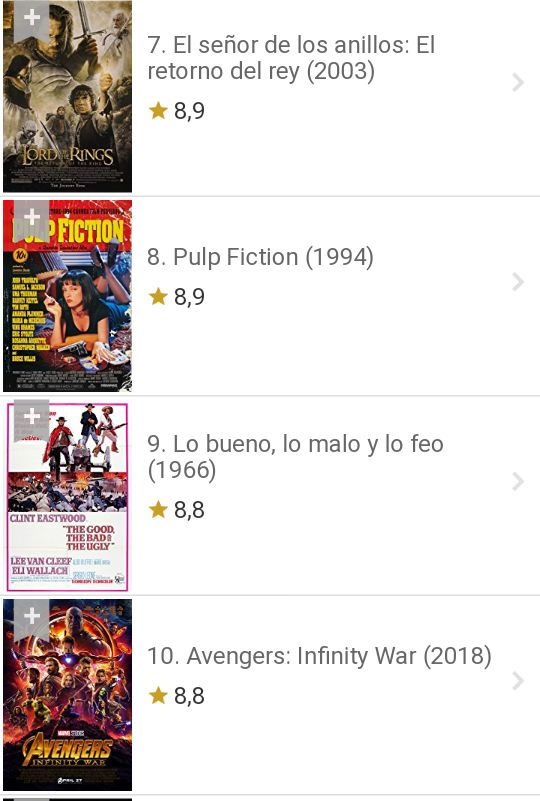

In [36]:
from IPython.display import Image
Image(filename = "images/db.jpg", width=400, height=300)

## Dataset Diabetes

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(type(diabetes))
print(type(diabetes.data))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


In [44]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis,2]
print(type(diabetes_X))

<class 'numpy.ndarray'>


#### Evaluación frente a Validación cruzada

La evaluación(o simplemente validación, depende del autor) y la validación cruzada son métodos estándares para medir el rendimiento de un modelo. Ambos generan métricas de evaluación que puede inspeccionar o comparar con las de otros modelos.

Evaluar modelo espera un conjunto de datos puntuado como entrada (o 2 en caso de que quiera comparar el rendimiento de 2 modelos distintos). Esto implica que debe entrenar el modelo mediante el módulo Train Model (Entrenar modelo) y realizar predicciones sobre algún conjunto de datos con el módulo Puntuar modelo, antes de poder evaluar los resultados. La evaluación se basa en las etiquetas y probabilidades puntuadas junto con las etiquetas verdaderas, las cuales son el resultado del módulo Puntuar modelo.

De forma alternativa, es posible usar la validación cruzada para realizar automáticamente varias operaciones de entrenamiento, puntuación y evaluación (10 subconjuntos) en distintos subconjuntos de los datos de entrada. Los datos de entrada se dividen en 10 partes, donde una se reserva para las pruebas y las otras 9 para el entrenamiento. Este proceso se repite 10 veces y se calcula el promedio de las métricas de evaluación. Esto ayuda a determinar el nivel al que un modelo se podría generalizar para nuevos conjuntos de datos. El módulo Validar modelo de forma cruzada toma un modelo sin entrenar y algunos conjuntos de datos con etiquetas y genera los resultados de la evaluación de cada uno de los 10 subconjuntos, además de los resultados promediados.



In [66]:
#Separar los datos de las variables descriptivas en entrenamiento y test 
diabetes_X_train = diabetes_X[:-20] #del índice 0 hasta el final, menos los últimos 20 valores

diabetes_X_test = diabetes_X[-20:] # últimos 20 valores 

#numero de ejemplos
diabetes_X_train.size

422

In [67]:

print(type(diabetes_X_train))

<class 'numpy.ndarray'>


Entonces tenemos $422$ ejemplos para entrenamient del modelo y $20$ ejemplos para probar el rendimiento del mimo.

In [46]:
#separar la variable obtetivo en entrenamiento y test
diabetes_y_train = diabetes.target[:-20]

diabetes_y_test = diabetes.target[-20:]

In [47]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [68]:
# Entrenar el modelo
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Predecir utilizando los datos de test
diabetes_y_pred = regr.predict(diabetes_X_test)

In [70]:
# Coeficiente de la ecuación de regresión
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
#R cuadrado
print('R 2: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
R 2: 0.47


# Regresión multiple

Utilizamos regresión múltiple cuando estudiamos la posible relación entre varias variables independientes (predictoras o explicativas) y otra variable dependiente. (criterio, explicada, respuesta). 

El conjunto de datos para este proyecto se origina en el Repositorio de aprendizaje automático de UCI. Los datos de vivienda de Boston se recopilaron en 1978 y cada una de las 506 entradas representa datos agregados sobre 14 características para hogares de varios suburbios en Boston, Massachusetts. 

<div class="alert alert-info" role="alert"><i class="fa fa-lightbulb-o" aria-hidden="true"></i> <strong>¡Más sobre el tema!</strong> <p> Descripción del dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names</div>

In [52]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importando los datasets de sklearn
#http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-example-dataset

from sklearn import datasets

boston = datasets.load_boston()
print(type(boston))
print(type(boston.data))
#cargar dataset
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head(5)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


La ecuación de Regresión Simple permite hacer predicciones de una variable en función de otra. El comportamiento (de los datos) es muy complejo, y hacer predicciones con una sola variable predictora es demasiado simple. Mejoraríamos la posibilidad de predicción (o explicación) del comportamiento si utilizamos más de una variable predictora. El caso más simple es tomar dos variables  predictoras para tratar de explicar mediante una regresión a la variable respuesta u varibale objetivo.


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.metrics import r2_score

from mpl_toolkits.mplot3d import Axes3D

#tomar dos variables del dataframe original
X = boston_df.as_matrix(['INDUS', 'PTRATIO'])
#obetener la varibale respuesta
Y = boston.target
# Dividir el dataset en conjunto de train/test
#train_test_split() divide el conjuton de forma automática tomando en cuenta estratificación
X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

C:\Users\SantaCruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [54]:
reg = linear_model.LinearRegression()
#crear el modelo
reg.fit(X_train, y_train)
#print(type(X))

#Si queremos predecir dos nuevos ejemplos, los almacenamos en un numpy array
x_nuevo = np.array([[1.02, 25.7], [4.87, 16.8]], np.float64)

#luego llamados a la función reg.predict()
print('Predict nuevo dato: ', reg.predict(x_nuevo))

Predict nuevo dato:  [15.57849048 28.08973683]


In [55]:
#otro forma de validar el modelo, la función score() no devuelbe R2
print('Score: ', reg.score(X_test, y_test))


Score:  0.3967195263606126


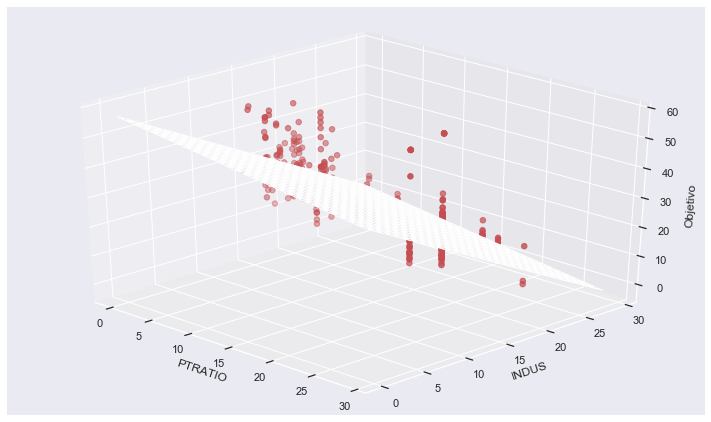

In [56]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')


ax.scatter(xs=boston_df['INDUS'], ys=boston_df['PTRATIO'], zs=boston.target,  c='r', s=30)

#ponerle nombre a los ejes
ax.set_ylabel('INDUS'); ax.set_xlabel('PTRATIO'); ax.set_zlabel('Objetivo')


xx, yy = np.meshgrid(range(0,30), range(0,30))

# calculate corresponding z
z = reg.coef_[0] * xx + reg.coef_[1] * yy +  reg.intercept_


# plot the surface
#ax = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, alpha=0.2)

#ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(30, -45)

Para crear un modelo con todas las variables descriptivas del data set podemos hacerlo de la siguiente forma

In [57]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

rl = LinearRegression() # Creando el modelo.
rl.fit(boston.data, boston.target) # ajustando el modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Lista de coeficientes B para cada X
list(zip(boston.feature_names, rl.coef_))

[('CRIM', -0.10801135783679561),
 ('ZN', 0.046420458366882376),
 ('INDUS', 0.020558626367074576),
 ('CHAS', 2.686733819344903),
 ('NOX', -17.766611228300146),
 ('RM', 3.80986520680923),
 ('AGE', 0.0006922246403394953),
 ('DIS', -1.4755668456002544),
 ('RAD', 0.30604947898517226),
 ('TAX', -0.012334593916574077),
 ('PTRATIO', -0.952747231707293),
 ('B', 0.009311683273793612),
 ('LSTAT', -0.5247583778554877)]

In [59]:
# haciendo las predicciones
predicciones = rl.predict(boston.data)

In [60]:
print(r2_score(boston.target,predicciones))

0.7406426641094094


In [61]:
#Ejercicio: mejorar alguno de los modelos vistos

# código para selección de variables
#x_ = df.set_index(['movie_facebook_likes', 'num_user_for_reviews']))
#x_=x_.values


# Validación cruzada 

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo que se llevará a cabo a la práctica.1​ Es una técnica muy utilizada en proyectos de inteligencia artificial para validar modelos generados.



In [62]:

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

#dimensiones de la matriz
print((boston.data.shape))

(506, 13)


In [63]:
#print(type(predicted))
#print(predicted.size)

In [64]:
r2_score(y, predicted)

0.5908571294061397

La siguiente gráfica muestra la correlación del modelo creado con los datos originales. Siempre se busca el modelo óptimo, cuando los datos se apegan a la linea de 45 grados punteada del gráfico.

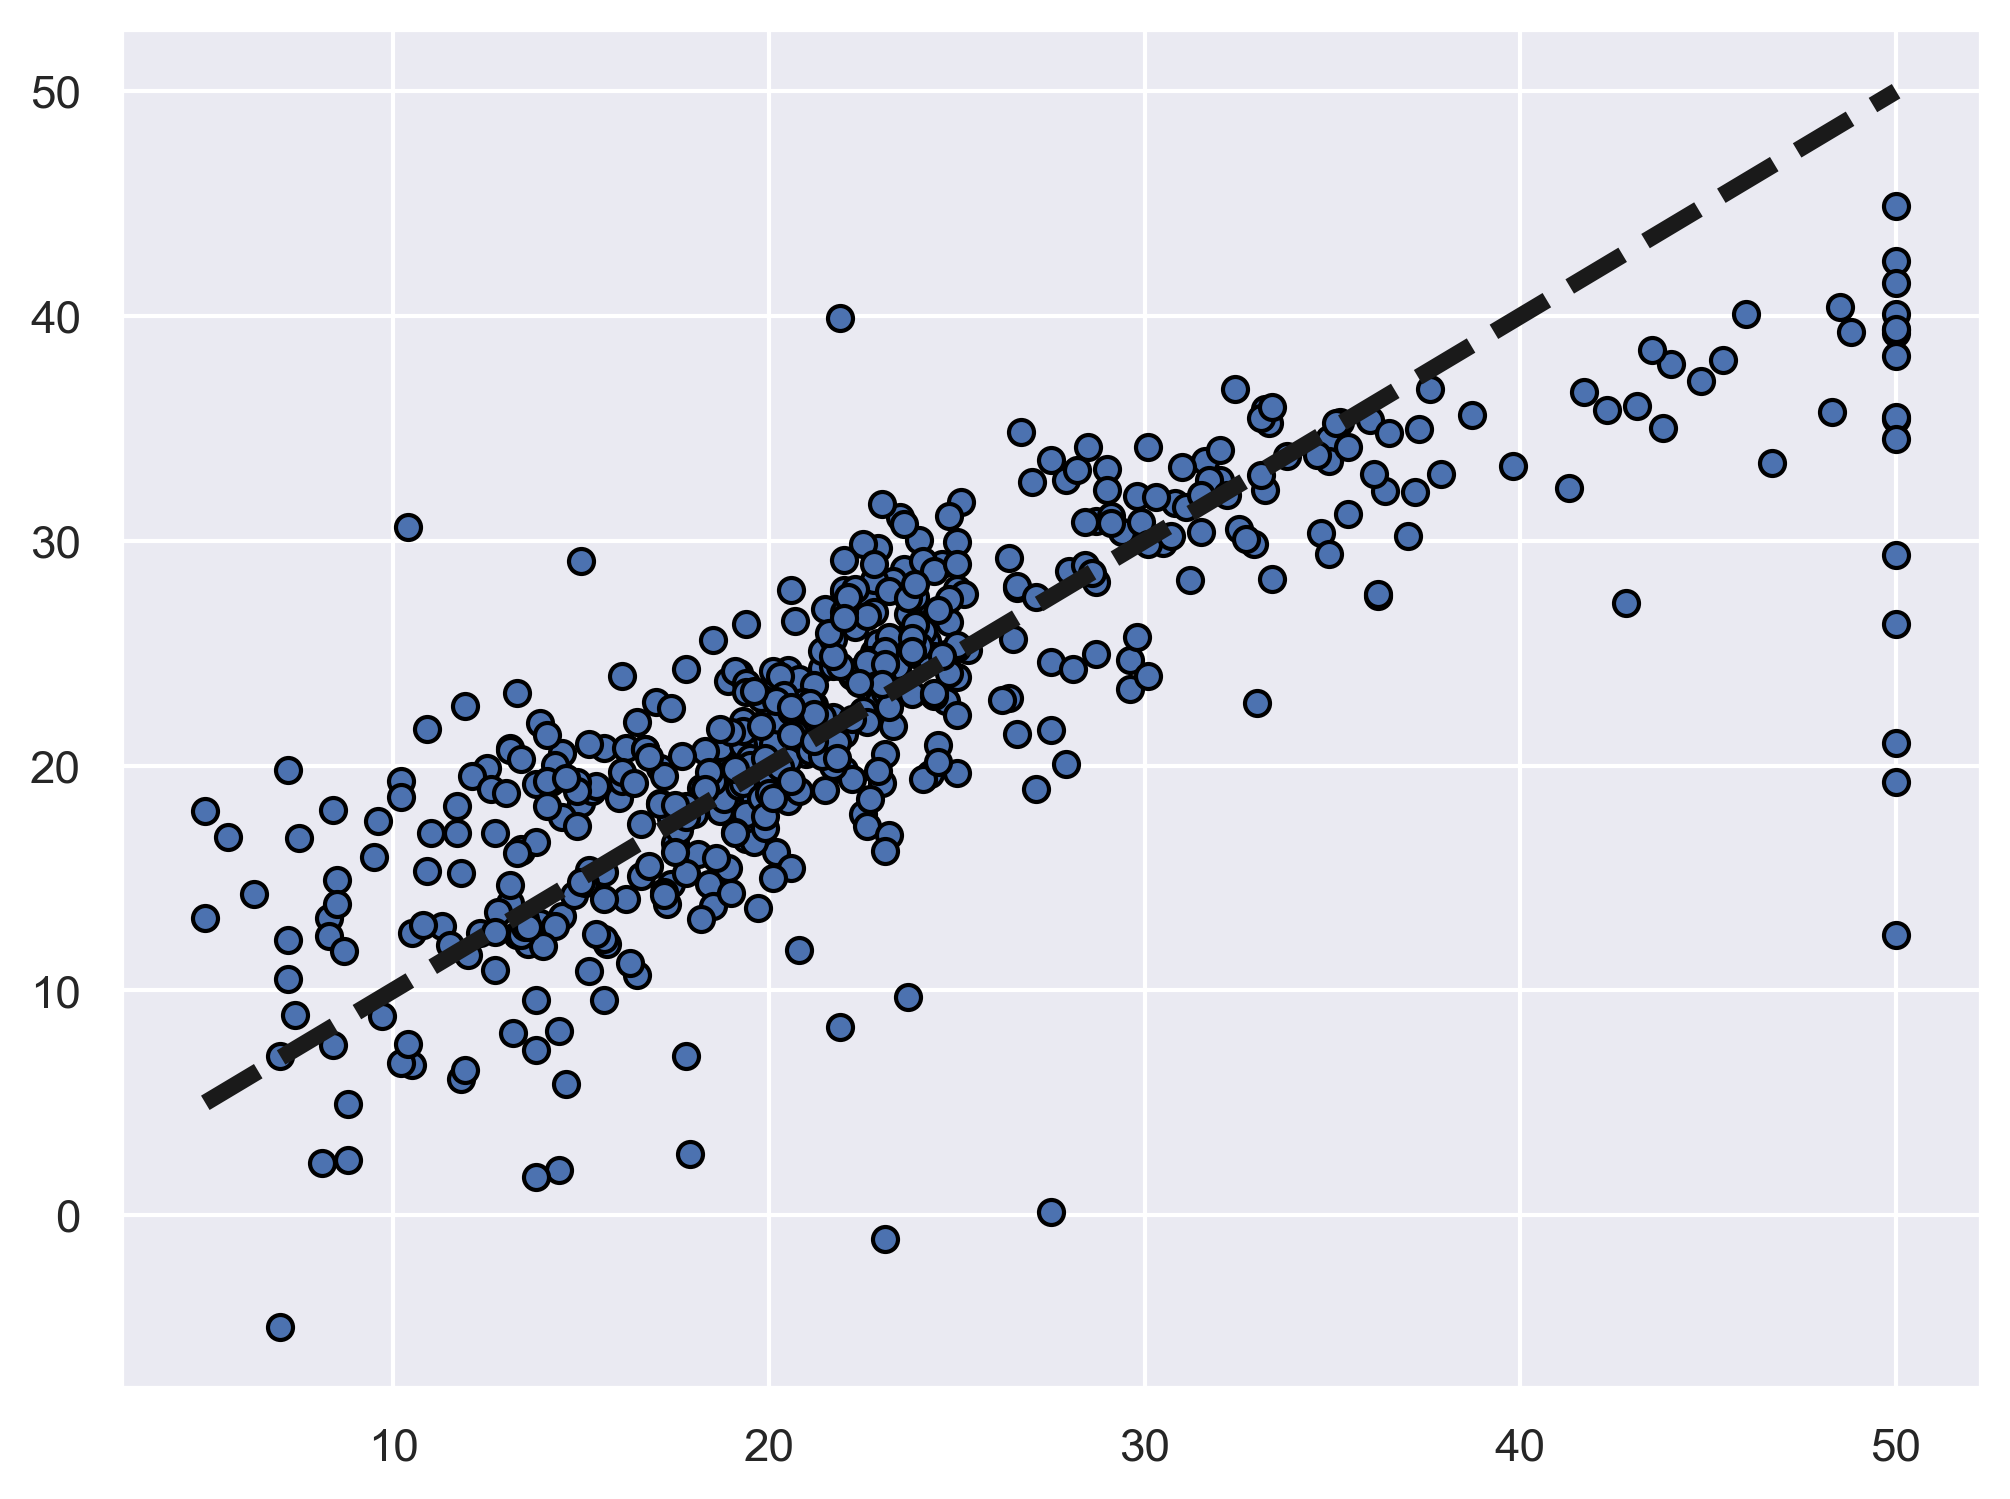

In [65]:
fig = plt.figure(num = None, figsize = (8, 6), dpi = 300, facecolor = 'w', edgecolor = 'k')
plt.grid(True)
plt.scatter(y, predicted, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

# Regresión lineal para la clasificación

### Clasificar mediante una recta de regresión lineal 

Cuando la variable respuesta es cualitativa podemos intentar predecir algún tipo de información de acuerdo a las variables descriptivas. Podemos clasificar o predecir si un persona va a _'caer en mora'_  o _'no va a caer en mora'_ de acuerdo al valance que tiene una persona en su tarjeta de cretido.

Podemos convertir los valores 'mora' en (1's) y 'no-moral' en (0's)

Al graficar la recta de regresión la separación de los dos grupos no es clara mediante la linea de regresión y existen probailidades negativas 

¿Que probabilidad tiene un cliente  de ser moroso?


En el gráfico se muestra cómo la regresión logística, en este conjunto de datos sintético, clasificaría los valores como 0 o 1, es decir, clase uno o dos, utilizando la curva logística.

<div class="alert alert-info" role="alert"><i class="fa fa-lightbulb-o" aria-hidden="true"></i> <strong>¡Más sobre el tema!</strong> <p> Comparación de variables categóricas y cuantitativas : https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/tables/supporting-topics/basics/categorical-and-quantitative-variables/</div>

C:\Users\SantaCruz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


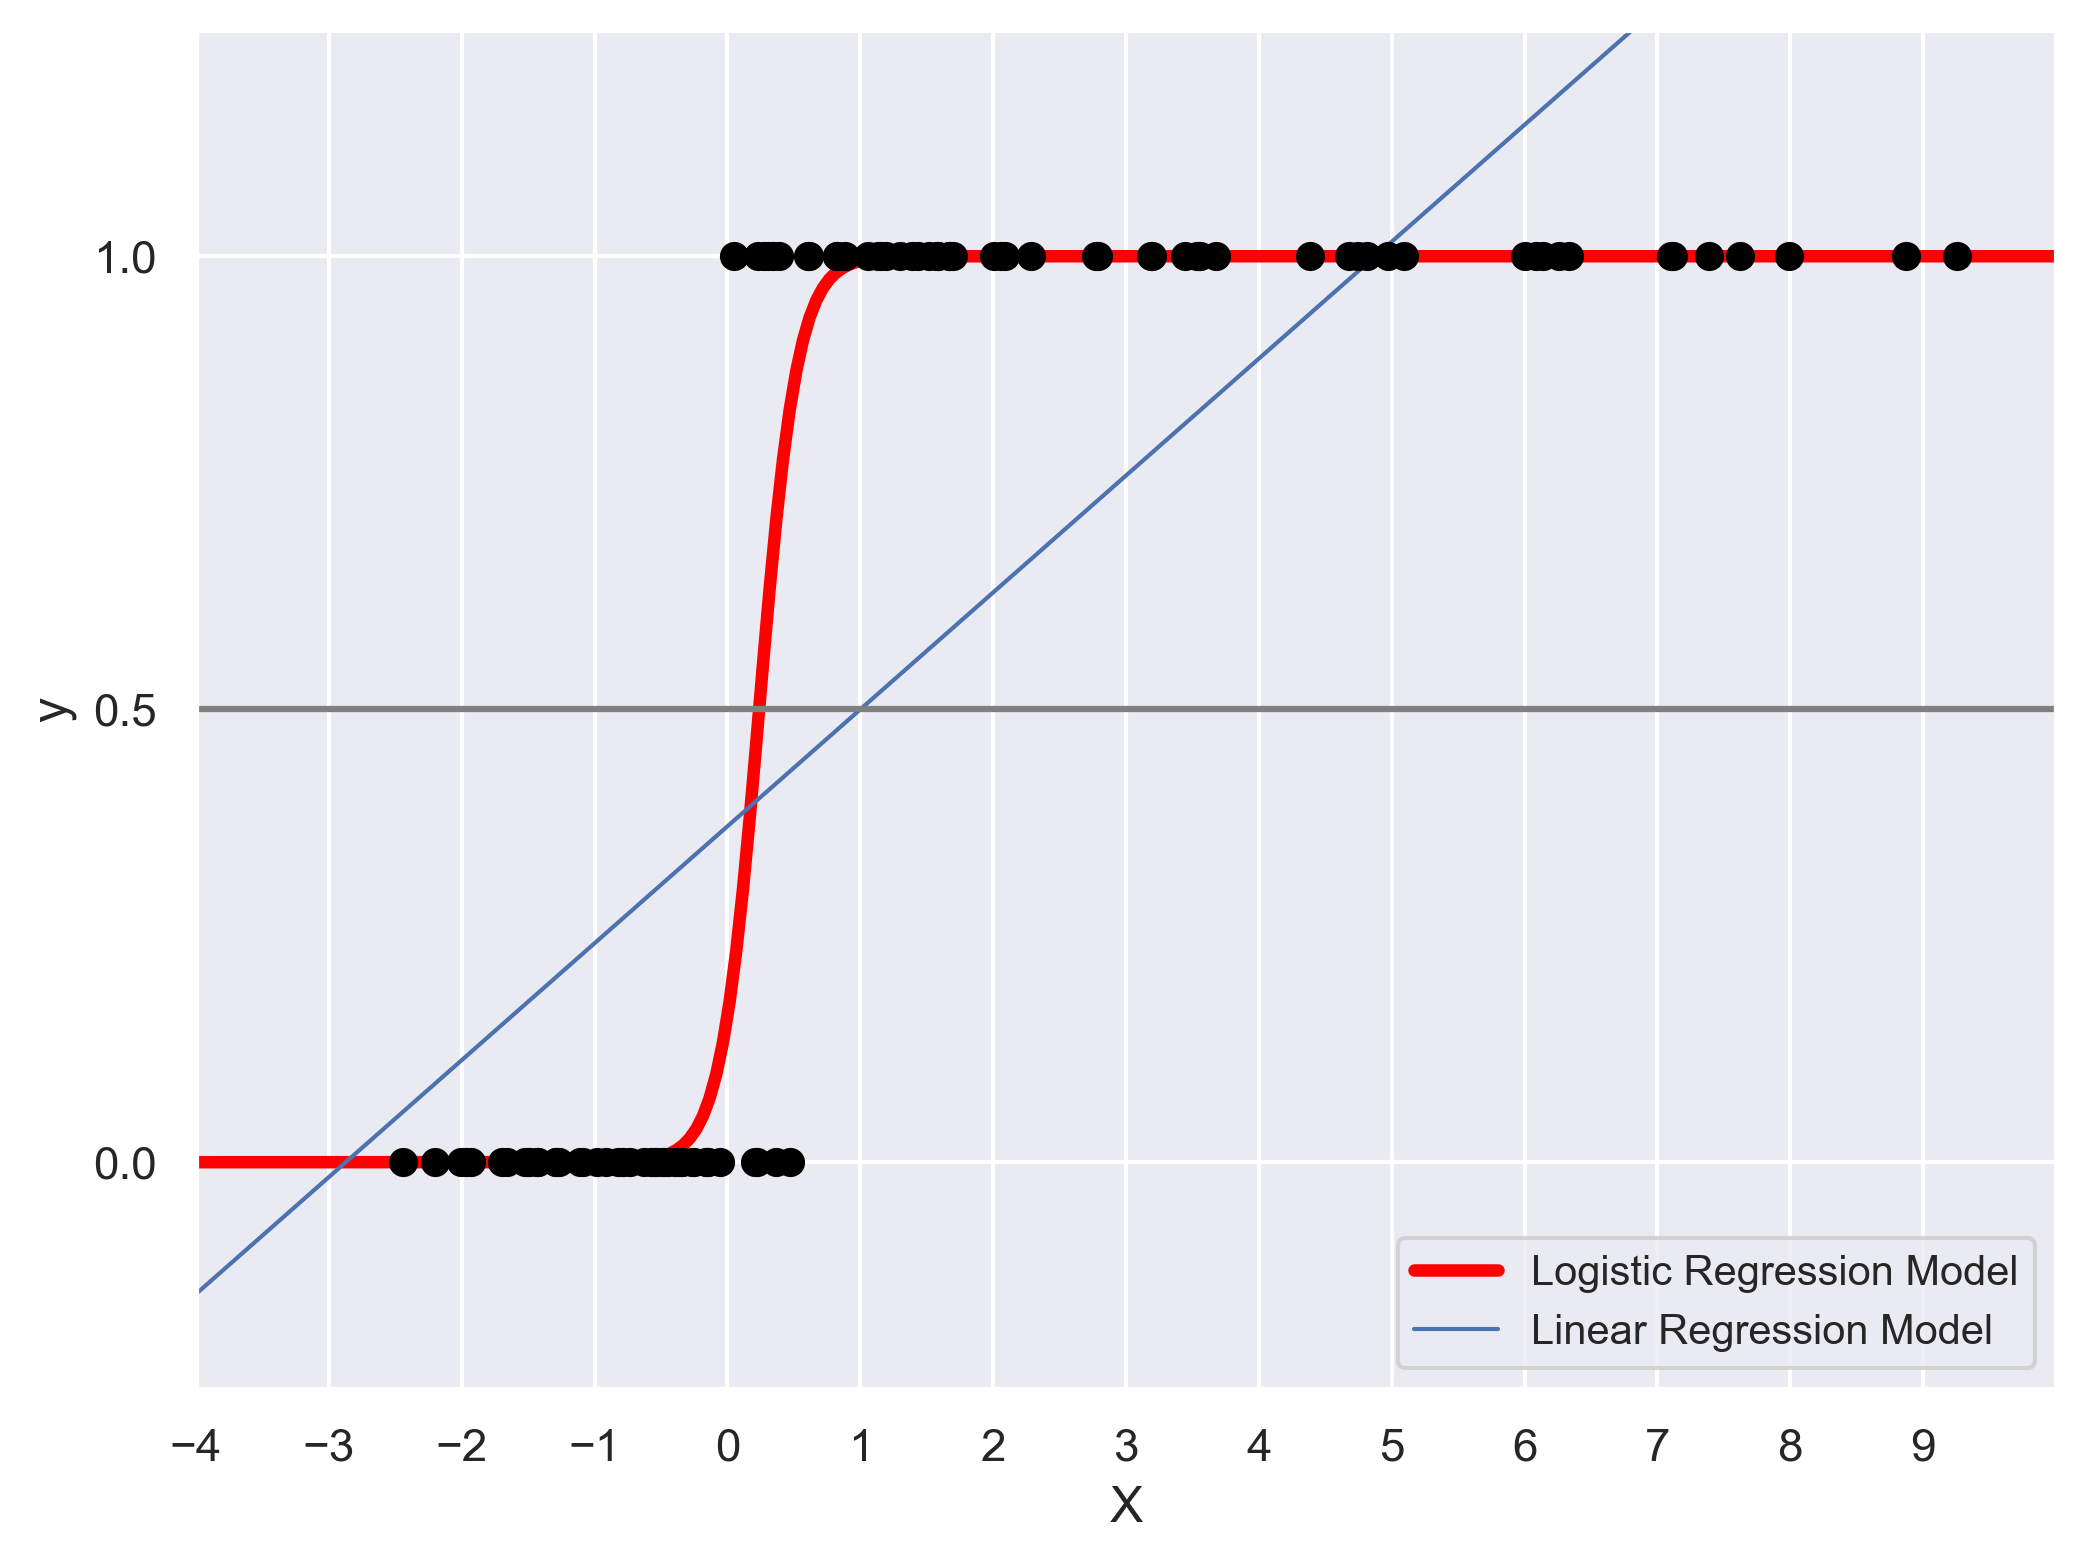

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
fig = plt.figure(num = None, figsize = (8, 6), dpi = 300, facecolor = 'w', edgecolor = 'k')
plt.grid(True)
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x_):
    return 1 / (1 + np.exp(-x_))


loss = model(X_test * clf.coef_ + clf.intercept_).ravel()

plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)

plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

## Tipos de regresión 

<img src="images/tipos_reg.png" height="800" width="800" >
